# Image Processing 

## Import libraries (Nhập thư viện):

In [17]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math

## Implementations (Cài đặt):

Hàm tăng độ sáng ảnh:

In [18]:
def brightenImage(image, scale = 0.5):
    image = image.astype(int)
    
    image += int(scale*255)
    image[image > 255] = 255
    
    image = image.astype(np.uint8)
    return image

Hàm thay đổi độ tương phản: 

In [19]:
def contrastImage(image, scale = 0.5):
    image = image.astype(float)

    image = image/255 - 0.5
    
    image *= float(1 + scale)**2
    
    image = (image + 0.5) * 255
    
    image[image > 255] = 255
    image[image < 0] = 0
    
    image = image.astype(np.uint8)
    return image

Hàm lật ảnh: 

In [20]:
def flipImage(image, dim, mode):
    image = image.reshape(dim)
    
    image = np.flip(image, mode)
    
    image = image.flatten()
    return image

Hàm chuyển ảnh thành ảnh xám (trắng đen):

In [21]:
def greyImage(image, alpha = 0.299, beta = 0.587, gamma = 0.114):
    image = image.astype(float)
    
    image = np.dot(image, np.array([alpha, beta, gamma])/(alpha + beta + gamma))
    image = (image*np.ones((3,1))).transpose()
    
    image = image.astype(np.uint8)
    return image

Hàm chuyển ảnh thành ảnh sepia:

In [22]:
def sepiaImage(image):
    image = image.astype(float)
    sepia_matrix = np.array([[0.393, 0.769, 0.189],
                             [0.349, 0.686, 0.168],
                             [0.272, 0.534, 0.131]])
    image_result = np.dot(image, sepia_matrix.T)
    image_result = np.clip(image_result, 0, 255)

    return image_result.astype(np.uint8)

Hàm làm mờ ảnh:

In [23]:
def blurImage(image, dim, kernel):
    image = image.reshape(dim)
    image_result = np.zeros(image.shape)
    
    kernelDim = kernel.shape[0]
    for i in range(kernelDim):
        for j in range(kernelDim):
            rowShiftValue = int(i - kernelDim/2)
            colShiftValue = int(j - kernelDim/2)
            shiftedArray = np.roll(image, (rowShiftValue, colShiftValue), axis=(0, 1))
            image_result += shiftedArray * kernel[i,j]
        
    image_result = image_result.flatten()
    
    image_result = image_result.astype(np.uint8)
    return image_result

Hàm làm sắc nét ảnh:

In [24]:
def sharpenImage(image, dim, kernel):
    image = image.reshape(dim)
    image_result = np.zeros(image.shape)
    
    kernelDim = kernel.shape[0]
    for i in range(kernelDim):
        for j in range(kernelDim):
            rowShiftValue = int(i - kernelDim/2)
            colShiftValue = int(j - kernelDim/2)
            shiftedArray = np.roll(image, (rowShiftValue, colShiftValue), axis=(0, 1))
            image_result += shiftedArray * kernel[i,j]
    
    image_result = image_result.astype(np.uint8)
    return image_result

Hàm cắt ảnh theo khung tròn:

In [25]:
def circleFrame(image, dim, mode = 0):
    image = image.reshape(dim)
    
    height = dim[0]
    width = dim[1]
    
    center = np.array([height/2, width/2])
    radius = mode*max(height/2, width/2) + (1 - mode)*min(height/2, width/2)
        
    x, y = np.ogrid[:height, :width]
                      
    mask_circle = (x - center[0])**2 + (y - center[1])**2 > radius**2
    image[mask_circle] = np.zeros(dim[2])
                      
    image = image.flatten()
    return image

Hàm giúp lưu lại ảnh:

In [26]:
def saveImage(opt, imName, image):
    image = Image.fromarray(image)
      
    if opt == 1:
        image.save(imName[:-4] + "_brighten" + imName[-4:])
    elif opt == 2:
        image.save(imName[:-4] + "_contrast" + imName[-4:])
    elif opt == 3:
        image.save(imName[:-4] + "_flip" + imName[-4:])
    elif opt == 4:
        image.save(imName[:-4] + "_grey" + imName[-4:])
    elif opt == 5:
        image.save(imName[:-4] + "_sepia" + imName[-4:])
    elif opt == 6:
        image.save(imName[:-4] + "_sharpen" + imName[-4:])
    elif opt == 7:
        image.save(imName[:-4] + "_blur" + imName[-4:])
    elif opt == 8:
        image.save(imName[:-4] + "_circleFrame" + imName[-4:])

Hàm hiển thị ảnh ra trên màn hình:

In [27]:
def showImage(optIndex, converted_image, Options):
    print("Option: ", optIndex, "-", Options[optIndex])
    plt.imshow(converted_image)
    plt.show()

Hàm tạo ảnh dựa trên ảnh nguồn và các lựa chọn:

In [28]:
def generateImage(optIndex, image):

    image = np.array(image)
    dim = image.shape
    
    image = image.flatten()
    image = image.reshape(int(image.shape[0]/3), 3)
    
    #Brighten    
    if optIndex == 1: 
        converted_image = brightenImage(image)
        
    #Contrast
    elif optIndex == 2:
        converted_image = contrastImage(image)
        
    #Flip
    elif optIndex == 3:
        mode = 0
        while True:
            print("Flip image:")
            print("0 - Vertically")
            print("1 - Horizontally")      
            mode = int(input("Choose options: "))
            if mode == 0 or mode == 1:
                  break
        
        converted_image = flipImage(image, dim, mode)
        
    #Grey
    elif optIndex == 4:
        converted_image = greyImage(image)
        
     #Grey
    elif optIndex == 5:
        converted_image = sepiaImage(image)
        
    #Sharp
    elif optIndex == 6:
        kernel = np.array([[0, -1, 0],
                           [-1, 5, -1],
                           [0, -1, 0]])
        kernel = kernel / np.sum(kernel)
        
        converted_image = sharpenImage(image, dim, kernel)
        
    #Blur
    elif optIndex == 7:
        
        kernel = np.ones((3, 3))
        kernel = kernel / np.sum(kernel)
        
        converted_image = blurImage(image, dim, kernel)
        
    #Circle Frame
    elif optIndex == 8:
        converted_image = circleFrame(image, dim) 
        
    #Reshape back into image's dimension 
    converted_image = converted_image.reshape(dim)
    
    return converted_image

Hàm main

Enter picture name: nature.jpg
0 / Run all
1 / Brighten image
2 / Increase contrast image
3 / Flip image
4 / Grey image
5 / Sepia image
6 / Sharpen image
7 / Blur image
8 / Cut a circle frame at center image
Choose options: 0
Option:  1 - Brighten image


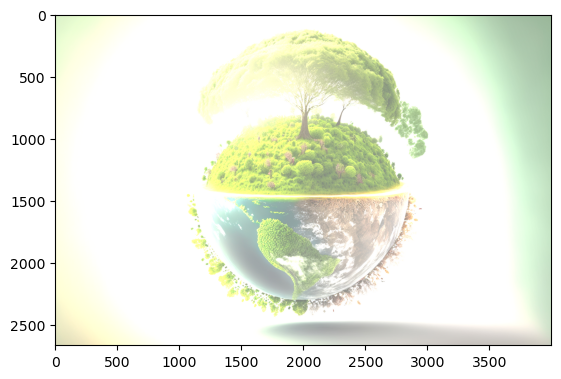

Option:  2 - Increase contrast image


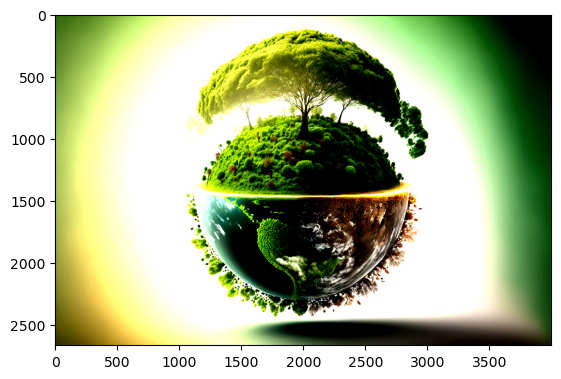

Flip image:
0 - Vertically
1 - Horizontally
Choose options: 1
Option:  3 - Flip image


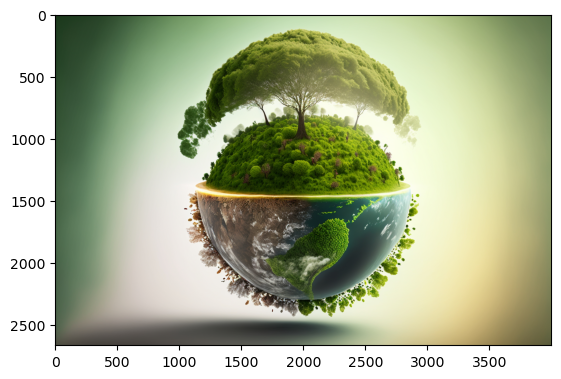

Option:  4 - Grey image


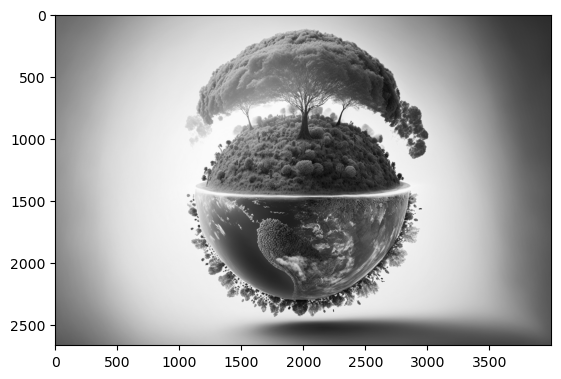

Option:  5 - Sepia image


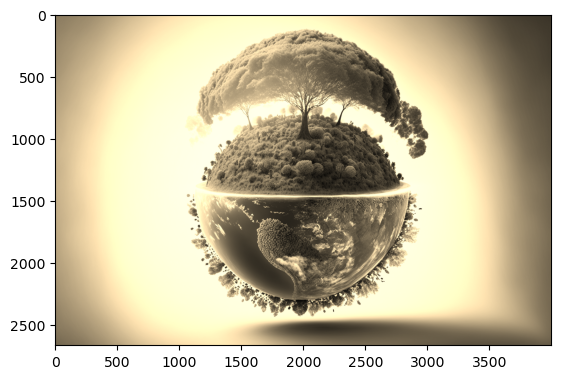

Option:  6 - Sharpen image


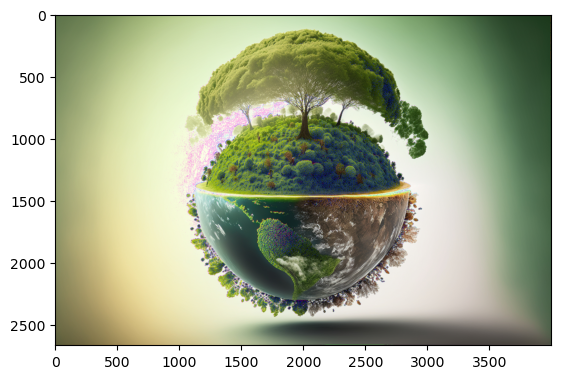

Option:  7 - Blur image


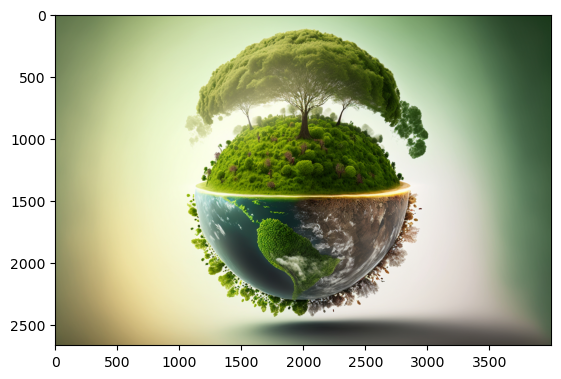

Option:  8 - Cut a circle frame at center image


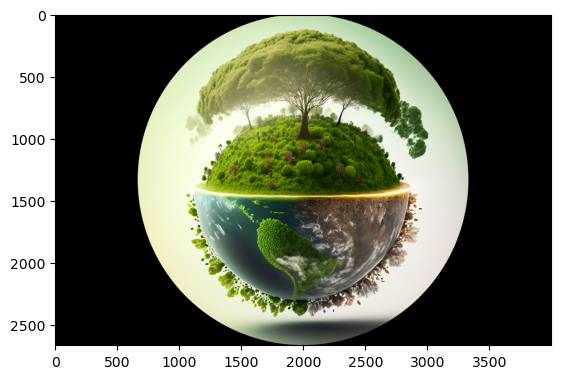

In [30]:
def main():
    Options = [
        "Run all",
        "Brighten image", 
        "Increase contrast image", 
        "Flip image",
        "Grey image",
        "Sepia image",
        "Sharpen image",
        "Blur image",
        "Cut a circle frame at center image"]
    
    imageName = input("Enter picture name: ")
    
    for i in range(len(Options)):
        print(i, "/", Options[i])
        
    optIndex = int(input("Choose options: "))
    image = Image.open(imageName, 'r')
    converted_image = np.array([])
    
    if optIndex == 0:
        for i in range(1, len(Options)):
            convertedImage = generateImage(i, image)
            showImage(i, convertedImage, Options)
            saveImage(i, imageName, convertedImage)
    else:
        converted_image = generateImage(optIndex, image)
        showImage(optIndex, convertedImage, Options)
        saveImage(optIndex, imageName, convertedImage)
main()    